In [535]:
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [543]:
df = pd.read_csv("Raw_Discipline_Dataset.csv")
df.index = df["Name"]
status = df["Enrolling Status"]
df = df.drop(columns = ["Name"])
df = df.drop(["BMX Freestyle","cycling road"],axis = 0)
df

,Trends index,gender ratio,injury rates,popularity among young social media (brand24),antidoping,Cutural index,appeared n times,age,visitor footprint,Countries Involved,Enrolling Status
Name,,,,,,,,,,,
swimming,1.10000,0.816905,3.0,74,0.4,1,31,178,532700,190,1
lacrosse field,0.90000,0.861521,3.2,16,4.0,0,2,148,82000,30,0
artistic gymnastics,3.13000,1.536080,5.4,37,0.0,2,31,128,900000,50,1
beach volleyball,0.56900,0.968750,3.2,50,0.3,1,8,77,450000,25,1
Canoeing sprint,0.00000,0.457184,3.4,13,0.5,1,21,155,240000,50,1
rugby sevens,0.25000,1.028200,3.0,37,0.8,1,3,145,134000,16,1
basketball 3*3,0.55500,1.015630,12.5,14,0.8,2,2,32,72000,13,1
rugby union,0.10000,0.980132,3.4,58,0.8,0,4,153,124000,24,0
Croquet,0.32142,0.461538,3.4,1,0.0,1,1,156,1440,30,0


In [325]:
# # df = df.drop(columns = ["Number of global sport fans"])
# df_test = df.loc[["breaking","table tennis"]]
# df = df.drop(["breaking","table tennis"], axis=0)
# status = df["Enrolling Status"]
# df = df.drop(columns = ["Enrolling Status","Name"])

In [327]:
# df["Gender Ratio"] = -df["Gender Ratio"]
# df["Injuries rate"] = -df["Injuries rate"]
# df["Antidoping AAF%"] = -df["Antidoping AAF%"]
# df["Age"] = -df["Age"]
# df["Visitor footprint(spectators number)"] = -df["Visitor footprint(spectators number)"]
# df

In [329]:
# scaler = MinMaxScaler()
# df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
# df_normalized
# df_test = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)

In [331]:
# df = pd.concat([df_normalized, df_test], axis=0, ignore_index=True)
# df.to_csv("mim_max_normalized_df.csv")

In [333]:
# df_normalized.drop([19,20,21],axis = 0)

In [335]:
# standarized_df = df.apply(zscore)
# df_test = df_test.drop(columns = ["Name"])
# df_test
# standarized_test = df_test.apply(zscore)

In [581]:
X = df.drop(columns = ["Enrolling Status"])
y = df["Enrolling Status"]
new_feature_names = ['TI', 'GR', 'IR', 'PY','AR','CI','OT','AG','VS','CT']  # 新的特征名列表
X.columns = new_feature_names

In [583]:
gnb = GaussianNB()
gnb.fit(X, y)

GaussianNB()

In [449]:
X_test = df_test.drop(columns = ["Enrolling Status"])
y_test = df_test["Enrolling Status"]

In [451]:
y_pred = gnb.predict(X_test)
print(y_test,y_pred)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"The Accuracy of Prediction: {accuracy}")
gnb.predict_proba(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Name


In [501]:
df = pd.read_csv("Raw_Sport_Dataset.csv")
name = df["Name"]

In [503]:
df_pred = pd.read_csv("Disciplines_predict.csv")
df_pred = df_pred.drop(columns = ["Name"])
df_pred

,Trends index,gender ratio,injury rates,popularity among young social media (brand24),antidoping,Cutural index,appeared n times,age,visitor footprint,Countries Involved
0,23.6525,0.86905,3.0,74,0.4,2,32,186,532700,190
1,3.2222,1.00000,3.4,53,0.6,2,0,17,0,190


In [587]:
pred = gnb.predict_proba(df_pred)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Countries Involved
- Cutural index
- Trends index
- age
- antidoping
- ...
Feature names seen at fit time, yet now missing:
- AG
- AR
- CI
- CT
- GR
- ...


In [511]:
pred

array([1, 1])

/var/folders/yl/87h_1ymd03q01frvtqhv14wh0000gn/T/ipykernel_6027/249114025.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Name
baseball and softball    75.9
gymnastics               64.9
shooting                 55.9
basketball               76.9
boxing                   76.9
tennis                   75.9
volleyball               74.9
skateboarding            60.9
handball                 54.9
cycling                  58.9
American football        61.9
Auto racing              48.9
Bowling                  74.9
Chess                    75.9
Flying disc              53.9
Lacrosse                 58.9
Squash                   70.9
Tug-of-war               50.9
Name: IR, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_perturbed.iloc[:, feature_index] += perturbation
/var/folders/yl/87h_1ymd03q01frvtqhv14wh0000gn/T/ipykernel_6027/249114025.py:8: FutureWarni

[0.0007404068633535219, 0.0005294636110276282, 0.00027242506910305094, 0.0017602862303236443, 0.0007229345351275449, 4.074987301976801e-07, 8.364806840740727e-06, 7.834159176667916e-05, 8.354066665680615e-05, 0.003463248927740229]


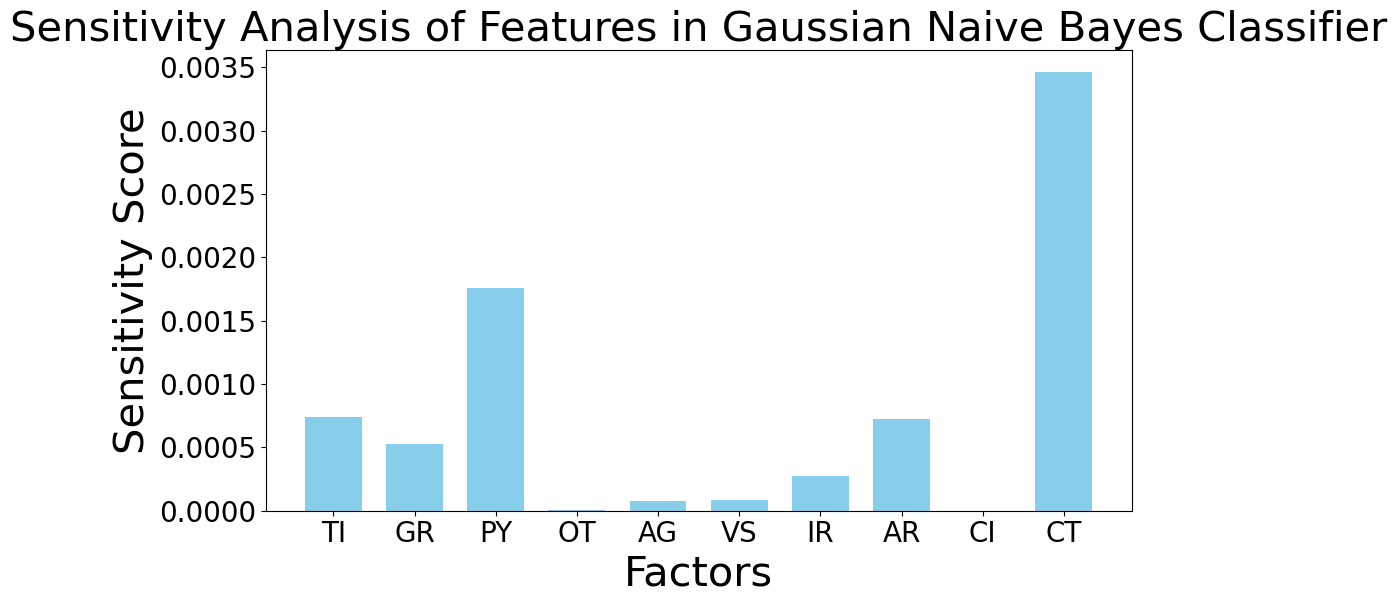

In [605]:

def sensitivity_analysis(model, X, y, feature_index, perturbation):
    """
    对单个特征进行扰动，计算模型预测变化的敏感性得分。
    """
    # 创建扰动数据副本
    X_perturbed = X.copy()
    # 仅扰动某一个特征
    X_perturbed.iloc[:, feature_index] += perturbation  
    
    # 预测扰动前后的结果
    y_pred = model.predict_proba(X)[:, 1]  # 使用预测概率，而不是类别标签
    y_perturbed_pred = model.predict_proba(X_perturbed)[:, 1]
    
    # 计算预测结果变化的幅度（例如，概率的绝对变化）
    change_rate = np.mean(np.abs(y_pred - y_perturbed_pred))  # 计算预测概率的变化幅度
    return change_rate


# 对所有特征进行敏感性分析
perturbation = 0.9  # 设置扰动幅度
sensitivity_scores = []

for feature_idx in range(X.shape[1]):
    score = sensitivity_analysis(gnb, X, y, feature_idx, perturbation)
    sensitivity_scores.append(score)
print(sensitivity_scores)

# 将敏感性结果可视化
plt.figure(figsize=(10, 6))
plt.xlabel('Factors', fontsize=30)  # X轴标签字体大小
plt.ylabel('Sensitivity Score', fontsize=30)  # Y轴标签字体大小

custom_order = ['TI', 'GR', 'PY', 'OT','AG','VS','IR','AR','CI','CT']  # 手动定义顺序
sorted_indices = [X.columns.tolist().index(col) for col in custom_order]
sorted_scores = [sensitivity_scores[i] for i in sorted_indices]

plt.bar(custom_order, sorted_scores, color='skyblue', width=0.7)
plt.ylabel('Sensitivity Score')
plt.title('Sensitivity Analysis of Features in Gaussian Naive Bayes Classifier',fontsize=30)
plt.tight_layout()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [607]:
sensitivity_scores_s = sensitivity_scores

In [609]:
df = pd.read_csv("Raw_Sport_Dataset.csv")
df.index = df["Name"]
status = df["Enrolling Status"]
df = df.drop(columns = ["Name"]) 0
df = df.drop(["breaking","table tennis"],axis = 0)
X = df.drop(columns = ["Enrolling Status"])
y = df["Enrolling Status"]
new_feature_names = ['TI', 'GR', 'IR', 'PY','AR','CI','OT','AG','VS','CT']  # 新的特征名列表
X.columns = new_feature_names
gnb1 = GaussianNB()
gnb1.fit(X, y)

for feature_idx in range(X.shape[1]):
    score = sensitivity_analysis(gnb1, X, y, feature_idx, perturbation)
    sensitivity_scores.append(score)

sensitivity_scores_d = sensitivity_scores

SyntaxError: invalid syntax (3635310759.py, line 4)

[0.0006136463458484137,
 0.00043578625589527146,
 0.001907607814651722,
 0.002783963706041,
 0.0011924781250828146,
 0.0006373624354176928,
 0.009897011029145319,
 0.002305493292592344,
 4.819111075700378e-07,
 0.0005207815070159473,
 0.000822842108800277,
 0.0005890409576465907,
 0.00030259249416804564,
 0.0019559526263388406,
 0.0008032134875789049,
 4.5277631996157e-07,
 9.295976676496065e-06,
 8.705142921569233e-05,
 9.28233493817839e-05,
 0.0038473260833571557,
 0.000822842108800277,
 0.0005890409576465907,
 0.00030259249416804564,
 0.0019559526263388406,
 0.0008032134875789049,
 4.5277631996157e-07,
 9.295976676496065e-06,
 8.705142921569233e-05,
 9.28233493817839e-05,
 0.0038473260833571557]

[0.0006136463458484137,
 0.00043578625589527146,
 0.001907607814651722,
 0.002783963706041,
 0.0011924781250828146,
 0.0006373624354176928,
 0.009897011029145319,
 0.002305493292592344,
 4.819111075700378e-07,
 0.0005207815070159473,
 0.000822842108800277,
 0.0005890409576465907,
 0.00030259249416804564,
 0.0019559526263388406,
 0.0008032134875789049,
 4.5277631996157e-07,
 9.295976676496065e-06,
 8.705142921569233e-05,
 9.28233493817839e-05,
 0.0038473260833571557,
 0.000822842108800277,
 0.0005890409576465907,
 0.00030259249416804564,
 0.0019559526263388406,
 0.0008032134875789049,
 4.5277631996157e-07,
 9.295976676496065e-06,
 8.705142921569233e-05,
 9.28233493817839e-05,
 0.0038473260833571557]